In [108]:
import numpy as np
from numpy import linalg

Уровень 0:
Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

In [109]:
A = np.array([[0.9999999999999, 0], [0, 0.9999999999999]])
A.dot(A.T)

array([[1., 0.],
       [0., 1.]])

С учетом того, что при умножении диагональной матрицы на ее транспонированную, диагональ возводится в квадрат, то создать диагональную, ортогональную и не единичную матрицу по идее не возможно, за исключением варианта с дробными числами, когда в квадрате они будут очень близки к единице, что при отображении даст единичную матрицу.

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

Хотелось бы увидеть примеры таких матриц и как их нашли.


По описанию ортоганальных матриц, в других источниках - "Сумма квадратов элементов каждой строки (столбца) ортогональной матрицы равна 1.", такие матрицы просто не возможны, если они не единичные, так как например берем первый столбец, если 1-ый элемент будет не равен единице, то не получится сумма квадратов всех элементов равной 1, а если будет равно единице, то с учетом квадратов, никогда не получится сумма квадратов по строке.

d) Матрица, у которой определитель = 1, и все элементы не равны 0

In [110]:
B = np.array([[2, 1], [1, 1]])
linalg.det(B)

1.0

Найдите собственные значения и собственные вектора матриц:

In [111]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [112]:
linalg.eig(m)

(array([1., 4.]),
 array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))



Уровень 1:


Найдите спектральное разложение матрицы:

In [113]:
n = np.array([[1, 2],
              [2,3]])
print(n)

[[1 2]
 [2 3]]


In [114]:
from sklearn.decomposition import PCA

In [115]:
pca = PCA(n_components=2)
pca.fit(n)
PCA(n_components=2)
print(pca.explained_variance_ratio_)

[1.00000000e+00 2.81351049e-34]


In [116]:
print(pca.singular_values_)

[1.00000000e+00 1.67735223e-17]


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

In [166]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
digits = load_digits()

In [167]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [147]:
def inp_fig(): #не сделана проверка на ввод букв, дробных чисел и т. п., при таком вводе будет валиться с ошибкой
    check_input = False
    while check_input == False:
        fig_t = input ("Пожалуйста, введите целое число от 0 до 9: ")
        if int (fig_t) in digits.target_names.tolist():
            check_input = True
            return fig_t
        else:
            print ("Введено некорректное число! Допустимы только целые числа от 0 до 9.")
     

In [174]:
def test_of_comp (test_fig):
    X = digits.images[int(test_fig)]
    print ("Массив описывающий цифру", X)
    print ("Оригинальная цифра выглядит вот так:")
    plt.gray() 
    plt.matshow(digits.images[int(test_fig)]) 
    plt.show() 
    size_X = X.shape
    size_for_comp = size_X[1]
    for i in range(size_for_comp):
        pca_1 = PCA(n_components=i)
        pca_1.fit(X)
        trans_fig = pca_1.transform(X)
        check_fig = pca_1.inverse_transform(trans_fig)
        err_check = mean_squared_error(X, check_fig)
        print ("Для", i, "компонент, точность востановления равна (чем число ближе к 0, там точнее востановлена картинка):",err_check)
        print ("Для", i, "компонент, цифра будет выглядеть следующим образом")
        plt.matshow(check_fig) 
        plt.show() 
    return
    

Пожалуйста, введите целое число от 0 до 9: 7
Массив описывающий цифру [[ 0.  0.  7.  8. 13. 16. 15.  1.]
 [ 0.  0.  7.  7.  4. 11. 12.  0.]
 [ 0.  0.  0.  0.  8. 13.  1.  0.]
 [ 0.  4.  8.  8. 15. 15.  6.  0.]
 [ 0.  2. 11. 15. 15.  4.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  9. 15.  1.  0.  0.  0.]
 [ 0.  0. 13.  5.  0.  0.  0.  0.]]
Оригинальная цифра выглядит вот так:


<Figure size 432x288 with 0 Axes>

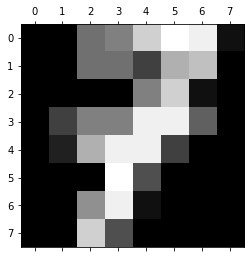

Для 0 компонент, точность востановления равна (чем число ближе к 0, там точнее востановлена картинка): 19.8125
Для 0 компонент, цифра будет выглядеть следующим образом


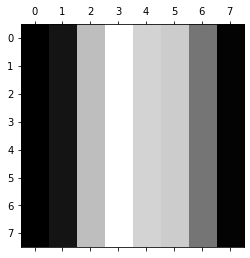

Для 1 компонент, точность востановления равна (чем число ближе к 0, там точнее востановлена картинка): 8.982228372089258
Для 1 компонент, цифра будет выглядеть следующим образом


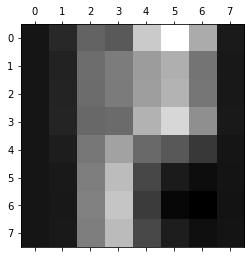

Для 2 компонент, точность востановления равна (чем число ближе к 0, там точнее востановлена картинка): 4.989928566977868
Для 2 компонент, цифра будет выглядеть следующим образом


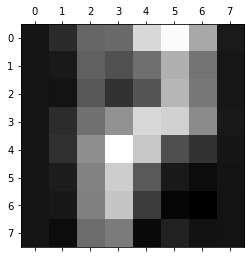

Для 3 компонент, точность востановления равна (чем число ближе к 0, там точнее востановлена картинка): 2.283962815854166
Для 3 компонент, цифра будет выглядеть следующим образом


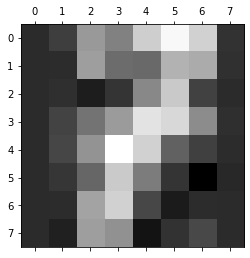

Для 4 компонент, точность востановления равна (чем число ближе к 0, там точнее востановлена картинка): 0.21688105721983286
Для 4 компонент, цифра будет выглядеть следующим образом


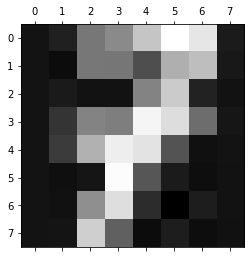

Для 5 компонент, точность востановления равна (чем число ближе к 0, там точнее востановлена картинка): 0.04694088846567068
Для 5 компонент, цифра будет выглядеть следующим образом


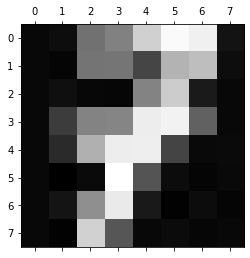

Для 6 компонент, точность востановления равна (чем число ближе к 0, там точнее востановлена картинка): 0.003091980604028509
Для 6 компонент, цифра будет выглядеть следующим образом


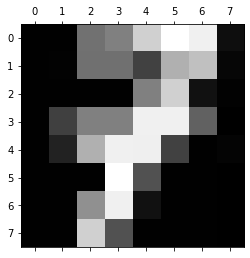

Для 7 компонент, точность востановления равна (чем число ближе к 0, там точнее востановлена картинка): 9.871709023290274e-30
Для 7 компонент, цифра будет выглядеть следующим образом


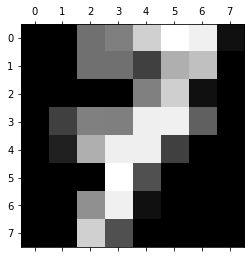

In [175]:
fig_for_test = inp_fig()
test_of_comp(fig_for_test)